## **Mount Google Drive to store files & data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1) Importing Python Packages for GAN**


In [ ]:
# from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D, Dense, Conv2DTranspose
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import numpy as np
!mkdir generated_images resized_images

In [ ]:
##!unzip the-zip-file -d name-of-destination-folder
!unzip /content/bobross2.zip -d bobross


In [ ]:
images_path = "/content/bobross/bobross2/"

## **Resizing Data to match Neural Network Input**

In [ ]:
#!mkdir generated_images resized_images
import os
# from PIL import Image
import cv2
reshape_size = (64,64)

i = 0
for image in os.listdir(images_path):
  #print(image)
  img = cv2.imread(images_path + image)
  img = cv2.resize(img, reshape_size)
  cv2.imwrite("resized_images/%d.png" % i,img)
  #print(img.shape)
  i+=1


## **2) Parameters for Neural Networks & Data**

In [ ]:
img_width = 64
img_height = 64
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(lr=0.0002)

## **3) Building Generator**





In [ ]:
def build_generator():
    model = Sequential()
    model.add(Dense(256 * 8* 8, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8,8,256)))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  
    model.summary()

    return model

generator = build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16384)             1654784   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16384)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                              

## **4) Building Discriminator**

In [ ]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), padding='same', ))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 256)      

## **5) Connecting Neural Networks to build GAN**

In [ ]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)
GAN.summary()
GAN.compile(loss='binary_crossentropy', optimizer=adam)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         2707203   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1566977   
                                                                 
Total params: 4,274,180
Trainable params: 2,707,203
Non-trainable params: 1,566,977
_________________________________________________________________


In [ ]:
generator.summary()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16384)             1654784   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16384)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                              

## **6) Outputting Images**


In [ ]:
#@title
## **7) Outputting Images**
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 4, 4
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001

    # Rescale images 0 - 1
    gen_imgs = (gen_imgs + 1) / 2.0

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("currentgeneration.png")
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

## **7) Training GAN**

In [ ]:
from PIL import Image

array = []
path = '/content/resized_images/'

for image in os.listdir(path):
  image = Image.open(path+image)
  data = np.asarray(image)
  array.append(data)

X_train = np.array(array)
X_train = X_train / 127.5-1.
print(X_train.shape)


(2612, 64, 64, 3)


In [ ]:
from PIL import Image

def train(epochs, batch_size=32, save_interval=200):
  #(X_train, _), (_, _) = cifar10.load_data()

  bat_per_epo = int(X_train.shape[0] / batch_size)
  # X_train = np.expand_dims(X_train, axis=3)
  # print(X_train.shape)

  #Create our Y for our Neural Networks
  valid = np.ones((batch_size, 1))
  fakes = np.zeros((batch_size, 1))

  for epoch in range(epochs):
    for j in range(bat_per_epo):
      #Get Random Batch
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]

      #Generate Fake Images
      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      gen_imgs = generator.predict(noise)

      #Train discriminator
      d_loss_real = discriminator.train_on_batch(imgs, valid)
      d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      
      #inverse y label
      g_loss = GAN.train_on_batch(noise, valid)

      print("******* %d %d [D loss: %f, acc: %.2f%%] [G loss: %f]" % (epoch,j, d_loss[0], 100* d_loss[1], g_loss))

      # if(epoch % save_interval) == 0:
    save_imgs(epoch)


train(60000, batch_size=24, save_interval=200)

1/1 [==============================] - 0s 330ms/step
******* 0 0 [D loss: 0.003790, acc: 100.00%] [G loss: 5.830875]
1/1 [==============================] - 0s 21ms/step
******* 0 1 [D loss: 0.003880, acc: 100.00%] [G loss: 6.262349]
1/1 [==============================] - 0s 18ms/step
******* 0 2 [D loss: 0.004528, acc: 100.00%] [G loss: 7.015150]
1/1 [==============================] - 0s 18ms/step
******* 0 3 [D loss: 0.001661, acc: 100.00%] [G loss: 9.256951]
1/1 [==============================] - 0s 19ms/step
******* 0 4 [D loss: 0.000083, acc: 100.00%] [G loss: 13.841499]
1/1 [==============================] - 0s 18ms/step
******* 0 5 [D loss: 0.000011, acc: 100.00%] [G loss: 20.634186]
1/1 [==============================] - 0s 19ms/step
******* 0 6 [D loss: 0.000008, acc: 100.00%] [G loss: 28.423096]
1/1 [==============================] - 0s 20ms/step
******* 0 7 [D loss: 0.462373, acc: 97.92%] [G loss: 0.080754]
1/1 [==============================] - 0s 18ms/step
******* 0 8 [D lo

KeyboardInterrupt: ignored

In [ ]:
noise = np.random.normal(0, 1, (16, latent_dim))
gen_imgs = generator.predict(noise)
gen_imgs = (gen_imgs + 1) / 2.0
# plt.imshow(gen_imgs[2])

1/1 [==============================] - 0s 207ms/step


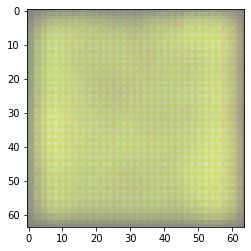

In [ ]:
plt.imshow(gen_imgs[6])

In [ ]:
generator.save_weights("/content/drive/MyDrive/models/generator1hour.h5")
discriminator.save_weights("/content/drive/MyDrive/models/discriminator1hour.h5")

OSError: ignored

### **8) Making GIF**

In [ ]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

NameError: ignored